### Cargamos las librerías

In [20]:
import pandas as pd
import seaborn as sns
import plotnine as p9
import requests
import io
from plotnine import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

cargamos la data preparada

In [3]:
s = requests.get('https://raw.githubusercontent.com/Roybermahe/Prediccion-Accidentes/main/data_preparation.csv').content
data = pd.read_csv(filepath_or_buffer=io.StringIO(s.decode('utf-8')), sep=',', header = 0)
data

,FECHA,GRAVEDAD,CLASE,CHOQUE_CON,TOTAL_MUERTOS,TOTAL_HERIDOS,LOCALIDAD,DISENO_LUGAR,DIASEMANA,SoloHora,SoloMinuto
0,01-01-2015,Con Heridos,Choque,Vehiculo,0,2,Engativá,Interseccion,JUEVES,9,45
1,01-01-2015,Solo Daños,Choque,Vehiculo,0,0,Suba,Tramo de Via,JUEVES,13,25
2,01-01-2015,Con Heridos,Volcamiento,NaN,0,1,Ciudad Bolívar,Tramo de Via,JUEVES,7,15
3,01-01-2015,Solo Daños,Choque,Vehiculo,0,0,Chapinero,Tramo de Via,JUEVES,20,30
4,01-01-2015,Solo Daños,Choque,Vehiculo,0,0,Ciudad Bolívar,Tramo de Via,JUEVES,12,50
...,...,...,...,...,...,...,...,...,...,...,...
150193,31-12-2019,Con Heridos,Choque,Vehiculo,0,2,Barrios Unidos,Tramo de Via,MARTES,7,0
150194,31-12-2019,Con Heridos,Choque,Vehiculo,0,1,Kennedy,Tramo de Via,MARTES,6,17
150195,31-12-2019,Con Heridos,Choque,Vehiculo,0,1,Fontibón,Tramo de Via,MARTES,0,30
150196,31-12-2019,Con Heridos,Choque,Vehiculo,0,2,Tunjuelito,Tramo de Via,MARTES,10,35


preparamos los datos faltantes de CHOQUE_CON remplazando los valores NaN por No Aplica

In [4]:
data['CHOQUE_CON'] = data['CHOQUE_CON'].fillna('No Aplica')
data

,FECHA,GRAVEDAD,CLASE,CHOQUE_CON,TOTAL_MUERTOS,TOTAL_HERIDOS,LOCALIDAD,DISENO_LUGAR,DIASEMANA,SoloHora,SoloMinuto
0,01-01-2015,Con Heridos,Choque,Vehiculo,0,2,Engativá,Interseccion,JUEVES,9,45
1,01-01-2015,Solo Daños,Choque,Vehiculo,0,0,Suba,Tramo de Via,JUEVES,13,25
2,01-01-2015,Con Heridos,Volcamiento,No Aplica,0,1,Ciudad Bolívar,Tramo de Via,JUEVES,7,15
3,01-01-2015,Solo Daños,Choque,Vehiculo,0,0,Chapinero,Tramo de Via,JUEVES,20,30
4,01-01-2015,Solo Daños,Choque,Vehiculo,0,0,Ciudad Bolívar,Tramo de Via,JUEVES,12,50
...,...,...,...,...,...,...,...,...,...,...,...
150193,31-12-2019,Con Heridos,Choque,Vehiculo,0,2,Barrios Unidos,Tramo de Via,MARTES,7,0
150194,31-12-2019,Con Heridos,Choque,Vehiculo,0,1,Kennedy,Tramo de Via,MARTES,6,17
150195,31-12-2019,Con Heridos,Choque,Vehiculo,0,1,Fontibón,Tramo de Via,MARTES,0,30
150196,31-12-2019,Con Heridos,Choque,Vehiculo,0,2,Tunjuelito,Tramo de Via,MARTES,10,35


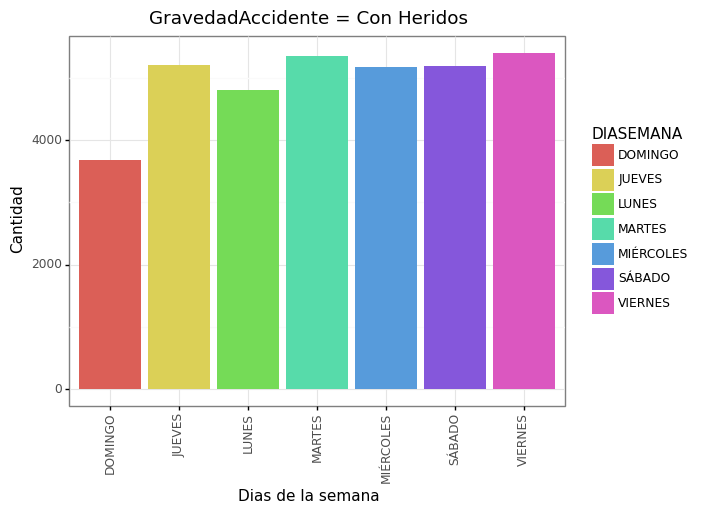

<ggplot: (16437049)>

In [5]:
data_con_heridos = data['GRAVEDAD'] == 'Con Heridos'
datasetHeridos = data[data_con_heridos]
listConHeridos = datasetHeridos['GRAVEDAD'].value_counts().index.tolist()
listConHeridos_Cat = pd.Categorical(datasetHeridos['GRAVEDAD'], categories=listConHeridos)

(p9.ggplot(data=datasetHeridos.assign(listConHeridos_Cat = listConHeridos_Cat),
           mapping=p9.aes(x='factor(DIASEMANA)', fill='DIASEMANA'))
    + p9.geom_bar()
    + p9.theme_bw()
    + p9.labs(y = 'Cantidad', x = "Dias de la semana", title = "GravedadAccidente = Con Heridos")
    + p9.theme(axis_text_x = p9.element_text(angle=90))
)

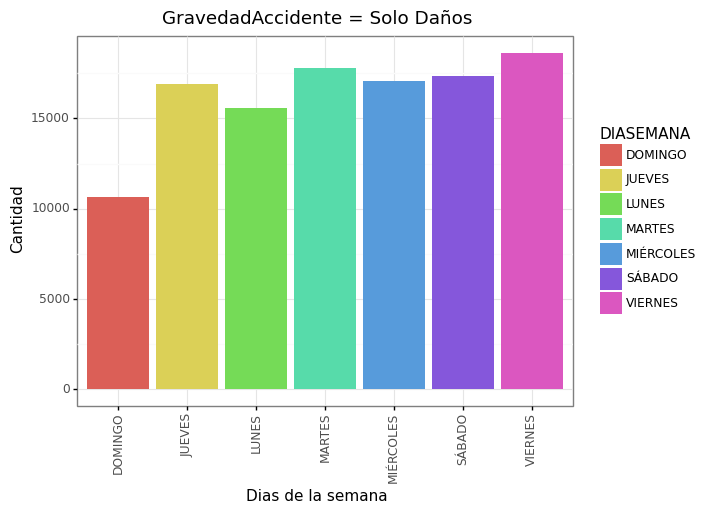

<ggplot: (32594273)>

In [6]:
data_con_daños = data['GRAVEDAD'] == 'Solo Daños'
datasetDaños = data[data_con_daños]
listConDaños = datasetDaños['GRAVEDAD'].value_counts().index.tolist()
listConDaños_Cat = pd.Categorical(datasetDaños['GRAVEDAD'], categories=listConDaños)

(p9.ggplot(data=datasetDaños.assign(listConDaños_Cat = listConDaños_Cat),
           mapping=p9.aes(x='factor(DIASEMANA)', fill='DIASEMANA'))
    + p9.geom_bar()
    + p9.theme_bw()
    + p9.labs(y = 'Cantidad', x = "Dias de la semana", title = "GravedadAccidente = Solo Daños")
    + p9.theme(axis_text_x = p9.element_text(angle=90))
)

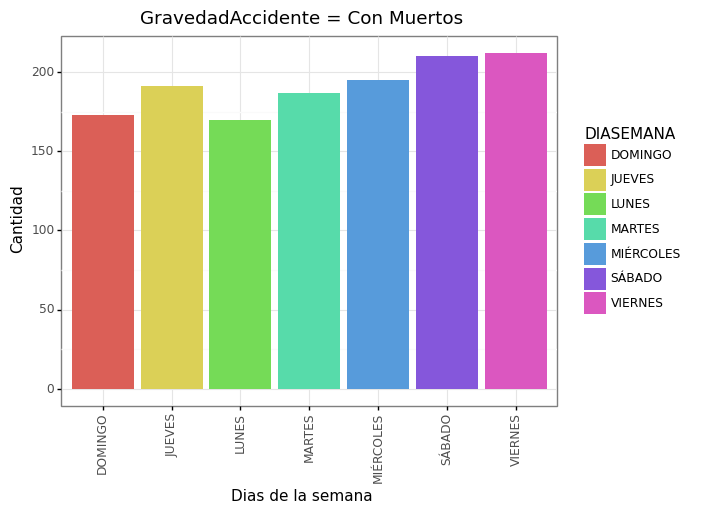

<ggplot: (32514685)>

In [7]:
data_con_muertos = data['GRAVEDAD'] == 'Con Muertos'
datasetMuertos = data[data_con_muertos]
listConMuertos = datasetMuertos['GRAVEDAD'].value_counts().index.tolist()
listConMuertos_Cat = pd.Categorical(datasetMuertos['GRAVEDAD'], categories=listConMuertos)

(p9.ggplot(data=datasetMuertos.assign(listConMuertos_Cat = listConMuertos_Cat),
           mapping=p9.aes(x='factor(DIASEMANA)', fill='DIASEMANA'))
    + p9.geom_bar()
    + p9.theme_bw()
    + p9.labs(y = 'Cantidad', x = "Dias de la semana", title = "GravedadAccidente = Con Muertos")
    + p9.theme(axis_text_x = p9.element_text(angle=90))
)

cantidad de muertos, heridos, daños segun la clase Choque

In [8]:
a = datasetMuertos['CLASE'] == 'Choque'
b = datasetHeridos['CLASE'] == 'Choque'
c = datasetDaños['CLASE'] == 'Choque'
print('Muertos: ' + str( len(datasetMuertos[a])))
print('Heridos: ' + str( len(datasetHeridos[b])))
print('Daños: ' + str( len(datasetDaños[c])))

Muertos: 1112
Heridos: 33227
Daños: 113672


cantidad de muertos, heridos, daños segun la clase Volcamiento

In [9]:
a = datasetMuertos['CLASE'] == 'Volcamiento'
b = datasetHeridos['CLASE'] == 'Volcamiento'
c = datasetDaños['CLASE'] == 'Volcamiento'
print('Muertos: ' + str( len(datasetMuertos[a])))
print('Heridos: ' + str( len(datasetHeridos[b])))
print('Daños: ' + str( len(datasetDaños[c])))

Muertos: 226
Heridos: 1605
Daños: 356


### Normalización de las variables

In [11]:
dataCopy = data.copy()
dataCopy['FECHA'] = dataCopy['FECHA'].astype('category').cat.codes
dataCopy['GRAVEDAD'] = dataCopy['GRAVEDAD'].astype('category').cat.codes
dataCopy['CLASE'] = dataCopy['CLASE'].astype('category').cat.codes
dataCopy['CHOQUE_CON'] = dataCopy['CHOQUE_CON'].astype('category').cat.codes
dataCopy['LOCALIDAD'] = dataCopy['LOCALIDAD'].astype('category').cat.codes
dataCopy['DISENO_LUGAR'] = dataCopy['DISENO_LUGAR'].astype('category').cat.codes
dataCopy['DIASEMANA'] = dataCopy['DIASEMANA'].astype('category').cat.codes
dataCopy.head()

,FECHA,GRAVEDAD,CLASE,CHOQUE_CON,TOTAL_MUERTOS,TOTAL_HERIDOS,LOCALIDAD,DISENO_LUGAR,DIASEMANA,SoloHora,SoloMinuto
0,0,0,0,4,0,2,5,2,1,9,45
1,0,2,0,4,0,0,14,9,1,13,25
2,0,0,1,0,0,1,4,9,1,7,15
3,0,2,0,4,0,0,3,9,1,20,30
4,0,2,0,4,0,0,4,9,1,12,50


### Matriz de correlación

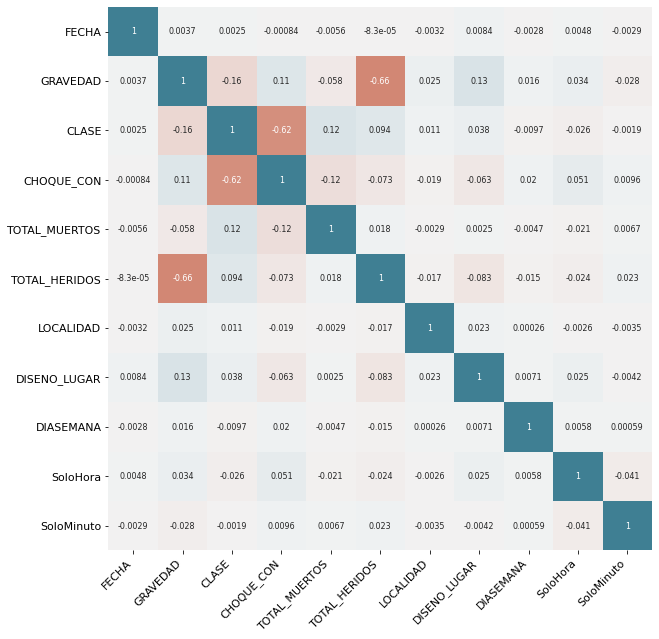

In [12]:
corr_matriz = dataCopy.corr(method='pearson')
fig, ax = plt.subplots(nrows = 1, ncols= 1, figsize = (10,10))
sns.heatmap(
corr_matriz,
annot=True,
cbar=False,
annot_kws={'size':8},
vmin=-1,
vmax=1,
center=0,
cmap=sns.diverging_palette(20,220,n=200),
square=True,
ax=ax
)
ax.set_xticklabels(
ax.get_xticklabels(),
rotation = 45,
horizontalalignment = 'right',
)
ax.tick_params(labelsize = 11)

### Analisis de datos atipicos

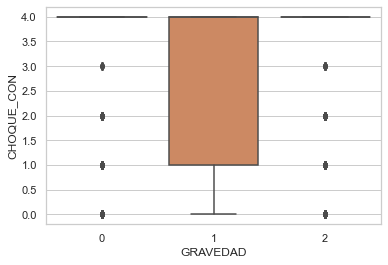

In [14]:
sns.set_theme(style='whitegrid')
ax = sns.boxplot(x='GRAVEDAD',y='CHOQUE_CON',data=dataCopy)

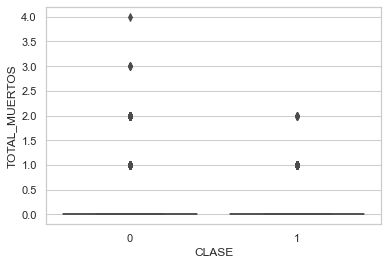

In [15]:
ax = sns.boxplot(x='CLASE',y='TOTAL_MUERTOS',data=dataCopy)

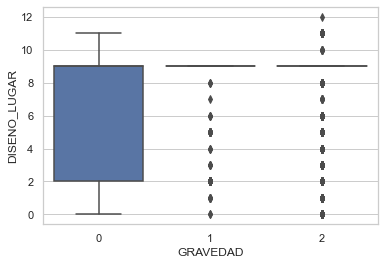

In [16]:
ax = sns.boxplot(x='GRAVEDAD',y='DISENO_LUGAR',data=dataCopy)

### Aplicación de KNN

definimos el tamaño de K

In [24]:
k_neighbors = 7

dividimos los datos X, Y

In [21]:
datafinal = {
    "clase": dataCopy['CLASE'],
    "total_muertos": dataCopy['TOTAL_MUERTOS'],
    "lugar": dataCopy['DISENO_LUGAR'],
    "choque_con": dataCopy['CHOQUE_CON']
}

X = pd.DataFrame(datafinal)
Y = dataCopy['GRAVEDAD']

definimos los datos de prueba y los escalamos

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

X_train = StandardScaler().fit_transform(X_train)
X_test= StandardScaler().fit_transform(X_test)

creamos el KNN clasificador

In [25]:
knn = KNeighborsClassifier(n_neighbors=k_neighbors)

entrenamos el modelo

In [26]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

predecimos la respuesta para el conjunto de datos de prueba

In [27]:
y_pred = knn.predict(X_test)
y_score = knn.predict_proba(X_test)[:,1]

precisión del modelo ¿ conque frecuencia predice bien el modelo?

In [28]:
columns = { "Y_TEST": y_test, "Y_PREDICT": y_pred}
comparacion = pd.DataFrame(columns)
comparacion

,Y_TEST,Y_PREDICT
7567,0,2
137075,2,2
69718,2,2
133074,2,0
145392,2,2
...,...,...
43941,2,2
29254,2,2
48518,2,2
126793,2,2


precisión del modelo y matriz de confusión

In [29]:
accuracy_knn = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy_knn)

Accuracy: 0.7605858854860187


In [30]:
confusion_mx_knn = metrics.confusion_matrix(y_test, y_pred)
confusion_mx_knn

array([[  552,     3,  6431],
       [    0,   291,     2],
       [  755,     1, 22005]], dtype=int64)

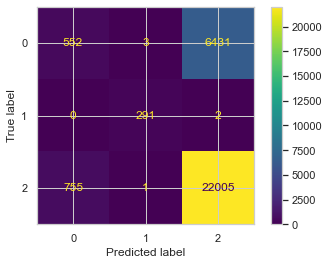

In [34]:
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_mx_knn,display_labels= knn.classes_)
disp.plot()